<a href="https://colab.research.google.com/github/MohiteAkshay/Music-Genre-Identification/blob/master/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0

--2020-08-10 05:33:40--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2020-08-10 05:33:40--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc09e4360fe5fe3499689e42dff1.dl.dropboxusercontent.com/cd/0/inline/A9Jajtre62yjpCr2KUqMgUHpy9Aqm3YlWMhXyyRaJMiJmAcbGsNuTZy6IQR7W95733LnXylOjnscOTlWsCfw7h3M2FTRr7wzd_54ctWxpqqEjQ/file# [following]
--2020-08-10 05:33:40--  https://uc09e4360fe5fe3499689e42dff1.dl.dropboxusercontent.com/cd/0/inline/A9Jajtre62yjpCr2KUqMgUHpy9Aqm3YlWMhXyyRaJMiJmAcbGsNuTZy6IQR7W95733LnXylOjnscOTlWsCfw7h3M2FTRr7wzd_54ctWxpqqEjQ/file
Resolving u

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [7]:
!unzip /content/genres.tar.gz?dl=0

Archive:  /content/genres.tar.gz?dl=0
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/genres.tar.gz?dl=0 or
        /content/genres.tar.gz?dl=0.zip, and cannot find /content/genres.tar.gz?dl=0.ZIP, period.

No zipfiles found.


In [ ]:
!tar -xvf  '/content/genres.tar.gz?dl=0' 

In [11]:
pip install librosa

In [41]:
import librosa
import librosa.display
import os

In [13]:
clip, sample_rate= librosa.load('/content/genres/blues/blues.00000.au', sr=None)
clip=clip[:132300]

In [14]:
clip

array([ 0.007324,  0.016602,  0.007629, -0.00351 , ...,  0.02713 ,  0.009186,  0.039642,  0.090302], dtype=float32)

In [65]:
def create_spect(fold):
  spectogram_path=Path('/content/spectro1')
  os.makedirs(spectogram_path/fold)
  audio_path=Path('/content/genres/')
  for audio_file in list(Path(audio_path/fold).glob('*.au')):
    sample, sample_rate=librosa.load(audio_file, duration= 10.0)
    fig= plt.figure(figsize=[0.72,0.72])
    ax=fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    filename= spectogram_path/fold/Path(audio_file).name.replace('.au','.jpg')
    S= librosa.feature.melspectrogram(y=sample , sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    plt.savefig(filename, dpi=400, bbox_inches='tight', pad_inches=0)
    plt.close('all')

In [66]:
classes=['country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
for cl in classes:
  create_spect(cl)

In [67]:
path='/content/spectro1'

In [68]:
data= (ImageList.from_folder(path)
.split_by_rand_pct(0.2)
.label_from_folder()
.transform([],size=224 )
.databunch(bs= 10)).normalize(imagenet_stats)

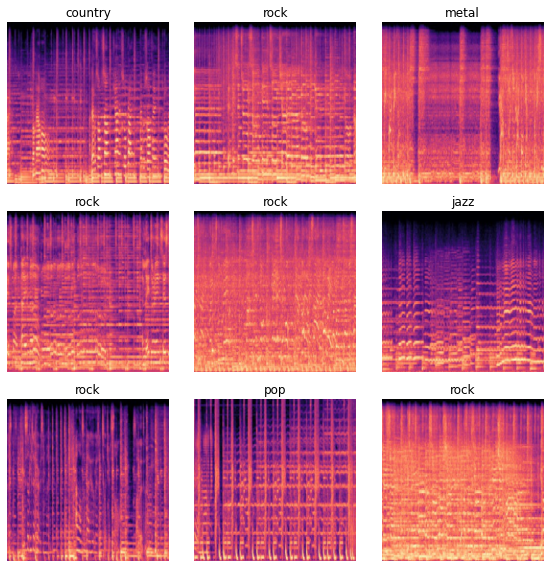

In [69]:
data.show_batch(rows=3, figsize=(8,8))

In [70]:
data

ImageDataBunch;

Train: LabelList (640 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
reggae,reggae,reggae,reggae,reggae
Path: /content/spectro1;

Valid: LabelList (160 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jazz,jazz,jazz,hiphop,reggae
Path: /content/spectro1;

Test: None

In [83]:
learn=cnn_learner(data, models.resnet34, metrics= error_rate)

In [85]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,0.503180,1.194574,0.337500,00:05
1,0.481710,1.271697,0.356250,00:05
2,0.456339,1.346316,0.406250,00:05
3,0.668132,1.351693,0.412500,00:05
4,0.673274,1.424251,0.381250,00:05
5,0.610142,1.441286,0.381250,00:05
6,0.678258,1.337857,0.325000,00:05
7,0.557455,1.333798,0.337500,00:05
8,0.466493,1.303634,0.356250,00:05
9,0.425356,1.329755,0.331250,00:05


In [91]:
learn.save('Stage-1')

In [86]:
learn.unfreeze()

In [87]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


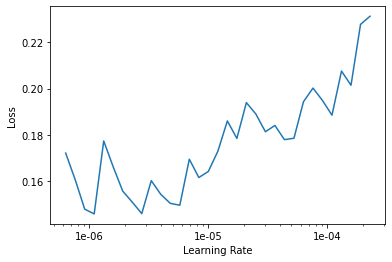

In [88]:
learn.recorder.plot()

In [90]:
learn.fit_one_cycle(5, max_lr=slice(2e-06))

epoch,train_loss,valid_loss,error_rate,time
0,0.163610,1.238280,0.331250,00:06
1,0.190124,1.213753,0.325000,00:06
2,0.243315,1.200835,0.325000,00:06
3,0.193132,1.214346,0.331250,00:06
4,0.190603,1.235193,0.331250,00:06
